<a href="https://colab.research.google.com/github/SharmaAshwini/UNT/blob/main/Methods%20in%20Empirical%20Analysis/Exercise_3_T_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ICE-3: T-Test and Basic Inference Principles

### **Task 1:** Statistical Inference
#### 1. Perform the Statistical Inference on the tutorial given using the dataset attached. (10%)
#### 2. After you are successful in executing and fixing the issues with the current version use dataset of your choice and execute it again. (30%)  
#### 3. Provide your detailed analysis on the tutorial and custom dataset version. (30%)
#### 4. Answer three Exploratory Data Analysis Questions(30%)

#### **NOTE**: Please choose a dataset that is related to a different domain i.e., COVID, Traffic, Cancer Patient etc.

### Exploratory Data Analysis

In [ ]:
!gdown '1jo_0sPUU0ugxaxvgBcf-OMupAsgzlnju'

Downloading...
From: https://drive.google.com/uc?id=1jo_0sPUU0ugxaxvgBcf-OMupAsgzlnju
To: /content/Accidents data.csv
100% 908k/908k [00:00<00:00, 132MB/s]


Q1) Which state had the most number of accidents?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Accidents data.csv')

common_causes = data['Accident State'].value_counts()

print("Common Causes of Pipeline Accidents:")
print(common_causes)


Common Causes of Pipeline Accidents:
TX    1004
OK     236
LA     169
CA     153
KS     150
IL     108
WY      98
NJ      85
MN      59
IN      57
NM      57
OH      53
ND      49
IA      46
PA      45
MO      42
MS      32
MT      30
MI      29
WI      27
CO      24
NE      22
AL      21
VA      20
GA      17
SC      16
NC      15
KY      14
NY      14
AR      13
AK      11
SD       9
WA       8
UT       8
MD       8
TN       7
FL       7
ID       4
OR       4
HI       3
CT       2
WV       2
MA       2
NV       1
ME       1
PR       1
Name: Accident State, dtype: int64


Q2)How have accident rates changed over time, and what might be the reasons behind those changes?

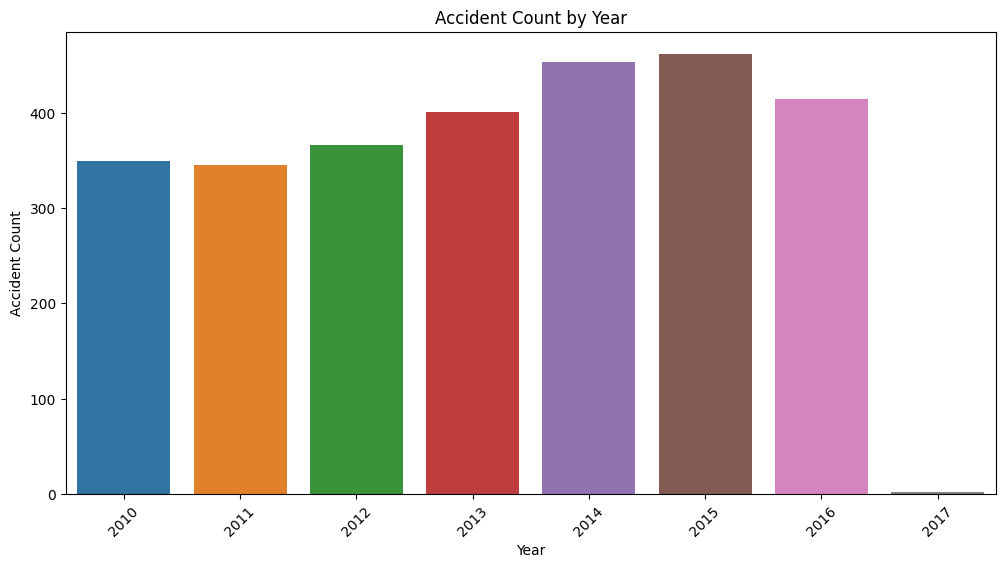

In [ ]:

data['Accident Date/Time'] = pd.to_datetime(data['Accident Date/Time'])

data['Year'] = data['Accident Date/Time'].dt.year
data['Month'] = data['Accident Date/Time'].dt.month

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Year')
plt.title('Accident Count by Year')
plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.show()

Q3) plot the accident rates by state

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 50 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Report Number                         2795 non-null   int64         
 1   Supplemental Number                   2795 non-null   int64         
 2   Accident Year                         2795 non-null   int64         
 3   Accident Date/Time                    2795 non-null   datetime64[ns]
 4   Operator ID                           2795 non-null   int64         
 5   Operator Name                         2795 non-null   object        
 6   Pipeline/Facility Name                2674 non-null   object        
 7   Pipeline Location                     2795 non-null   object        
 8   Pipeline Type                         2777 non-null   object        
 9   Liquid Type                           2795 non-null   object        
 10  

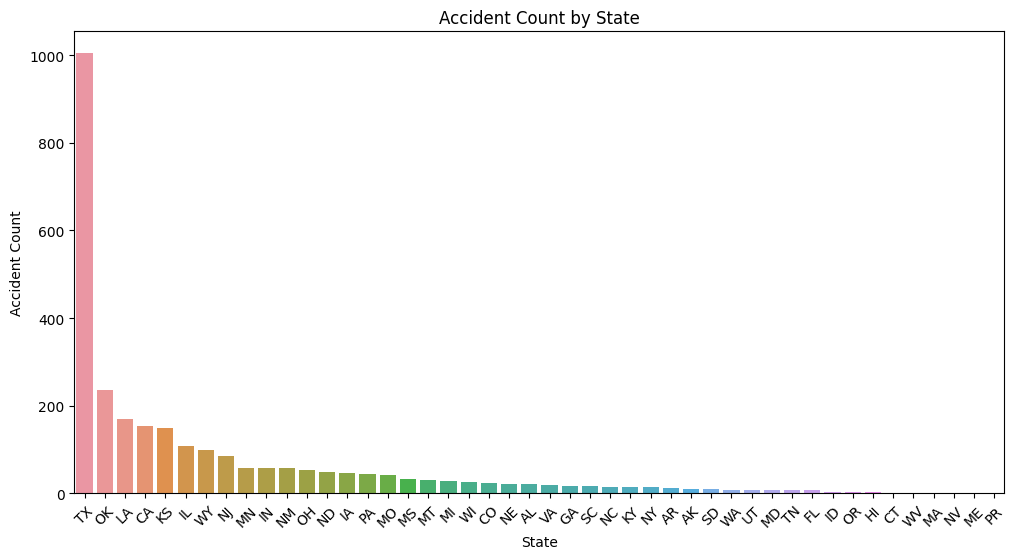

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Accident State', order=data['Accident State'].value_counts().index)
plt.title('Accident Count by State')
plt.xlabel('State')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.show()

Q4) What are the most common types of liquids involved in pipeline accidents in the dataset, and what is their frequency?

In [ ]:
common_liquid_types = data['Liquid Type'].value_counts()

print("Common Types of Liquids involved in Pipeline Accidents:")
print(common_liquid_types)


Common Types of Liquids involved in Pipeline Accidents:
CRUDE OIL                                               1398
REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID       939
HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS               418
CO2 (CARBON DIOXIDE)                                      38
BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)       2
Name: Liquid Type, dtype: int64


Q5) Plot the distribution of accidents by Liquid Type

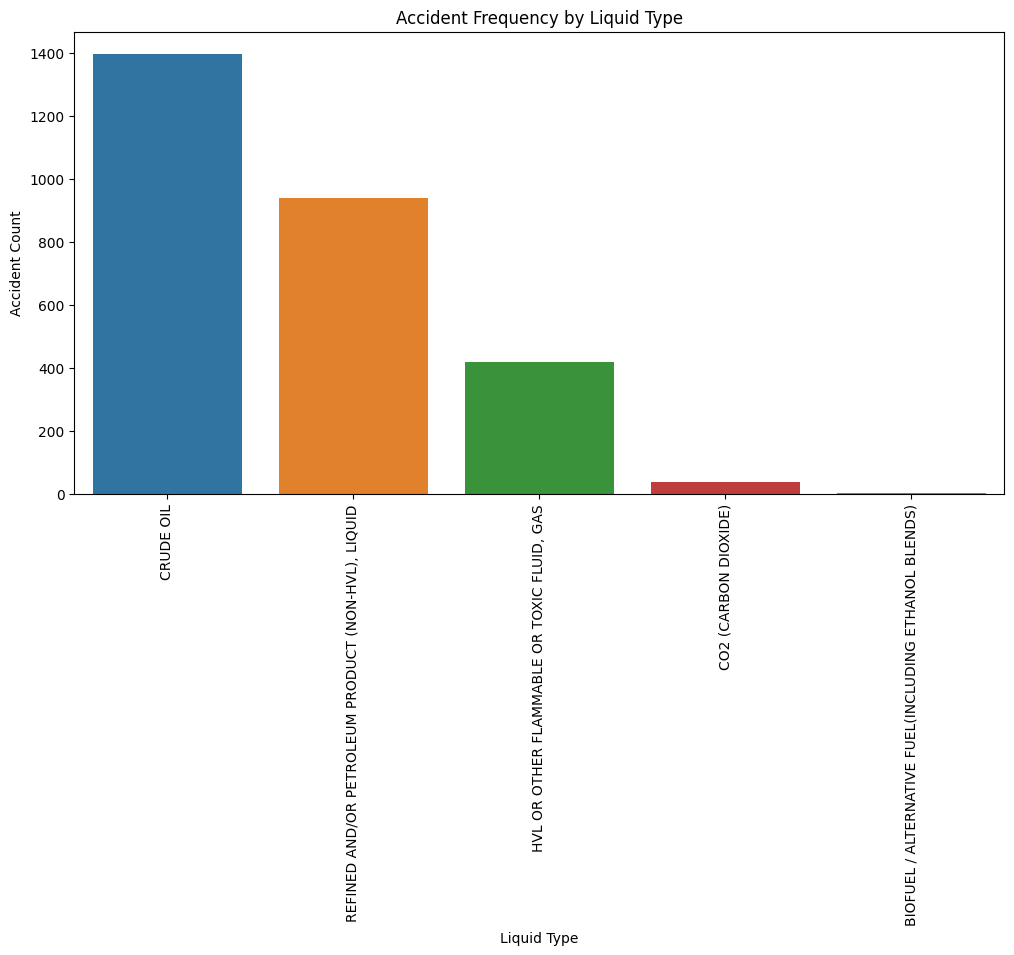

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Liquid Type', order=data['Liquid Type'].value_counts().index)
plt.title('Accident Frequency by Liquid Type')
plt.xlabel('Liquid Type')
plt.ylabel('Accident Count')
plt.xticks(rotation=90)
plt.show()

#Statistical Inference
Exploratory data analysis and statistical inference is performed on a dataset which contains oil pipeline accidents reported to the Pipeline and Hazardous Materials Safety Administration between 2010 and 2017.
##1. Importing the required Libraries.

In [ ]:
import pandas as pd
data = pd.read_csv('Accidents data.csv')
cols_of_interest = ['Accident Date/Time','Accident State','Pipeline Location','Liquid Type','Net Loss (Barrels)','All Costs']
data = data[cols_of_interest] #remove columns not needed for this analysis
print(data.head(5))

  Accident Date/Time Accident State Pipeline Location  \
0   1/1/2010 7:15 AM             KS           ONSHORE   
1   1/4/2010 8:30 AM             ME           ONSHORE   
2  1/5/2010 10:30 AM             LA           ONSHORE   
3   1/6/2010 7:30 PM             WI           ONSHORE   
4   1/7/2010 1:00 PM             TX           ONSHORE   

                                  Liquid Type  Net Loss (Barrels)  All Costs  
0  HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS                21.0       1627  
1                                   CRUDE OIL                 0.0       4008  
2  HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS                 2.0        200  
3                                   CRUDE OIL                 0.0      11540  
4                                   CRUDE OIL                 2.0      29650  


Statistical Inference is the method of using the laws of probability to analyze a sample of data from a larger population to learn about the population. In this case, oil pipeline accidents in US between 2010–2017 serve as a sample from a larger population of all oil pipeline accidents in US. Let us now calculate the summary statistics around our variables of interest in the sample i.e. costs incurred and loss of oil due to oil pipeline accidents.

Looking at the summary statistics for both our variables presence of extreme values can easily be inferred because of extremely large MAX values as compared to their means and also significantly large standard deviations also indicates larger variance from the mean values of the variables. A Box-plot is a better way of visualizing this summary.

##2. Box Plot

<ipython-input-9-0719801f2432>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


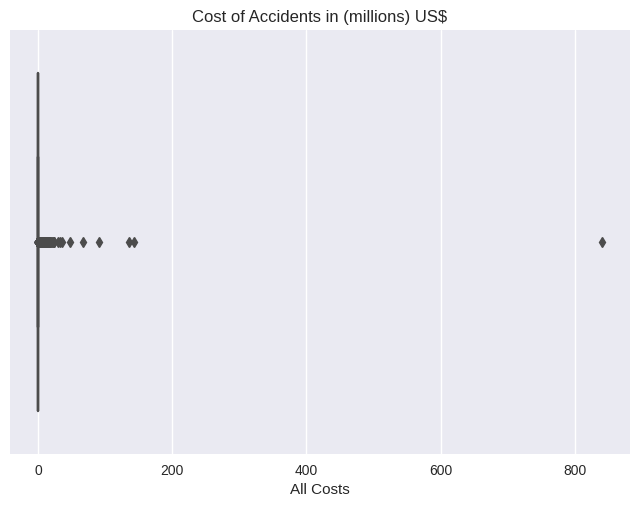

In [ ]:
import seaborn  as sns
import matplotlib.pyplot as plt

data['All Costs'] = data['All Costs'] / 1000000

plt.style.use('seaborn')

sns.boxplot(data=data, x='All Costs')
plt.title('Cost of Accidents in (millions) US$')
plt.show()

plt.close()



plt.show()

#Poisson Distribution:
The Poisson Distribution models a process in which mean number of events occur in a fixed interval of time or space. The probability of events occurring in that interval is expressed by the Poisson Distribution with parameter λ and the process is called the Poisson Process. For a process to follow a Poisson Distribution the observed events cannot occur simultaneously, and the occurrence of each event is independent to the occurrence of the previous event in disjoint intervals of time or space.

In our scenario, if our assumption about oil pipeline accidents in US is correct that they do not occur simultaneously and that the occurrence of one accident has no impact on the occurrence of another accident, then the number accidents, X is a random variable with a Poisson Distribution X ~ Poisson(λ). To estimate the parameter for our distribution, we just count the number of accidents in our sample and divide it by the total time span.

In [ ]:
import numpy as np
data['Accident Date/Time'] = pd.to_datetime(data['Accident Date/Time'])
totaltimespan = np.max(data['Accident Date/Time']) - np.min(data['Accident Date/Time'])

totaltime_hour = (totaltimespan.days*24 + totaltimespan.seconds/(3600))
totaltime_month = (totaltimespan.days + totaltimespan.seconds/(3600*24)) *12/365

lmda_h = len(data) / totaltime_hour
lmda_m = len(data) / totaltime_month

print('Estimated no. of accidents per hour: {}'.format(lmda_h))
print('Estimated no. of accidents per month: {}'.format(lmda_m))

#Estimated no. of accidents per hour: 0.04540255169379675
#Estimated no. of accidents per month: 33.14386273647162

Estimated no. of accidents per hour: 0.04540255169379675
Estimated no. of accidents per month: 33.14386273647162


Using NumPy in python, a random sample form a Poisson Distribution can then be generated to model our data with estimated λ to be 33 accidents per month. Let’s see how the distribution looks like and what can be inferred from it.



<ipython-input-11-250c6e35c487>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


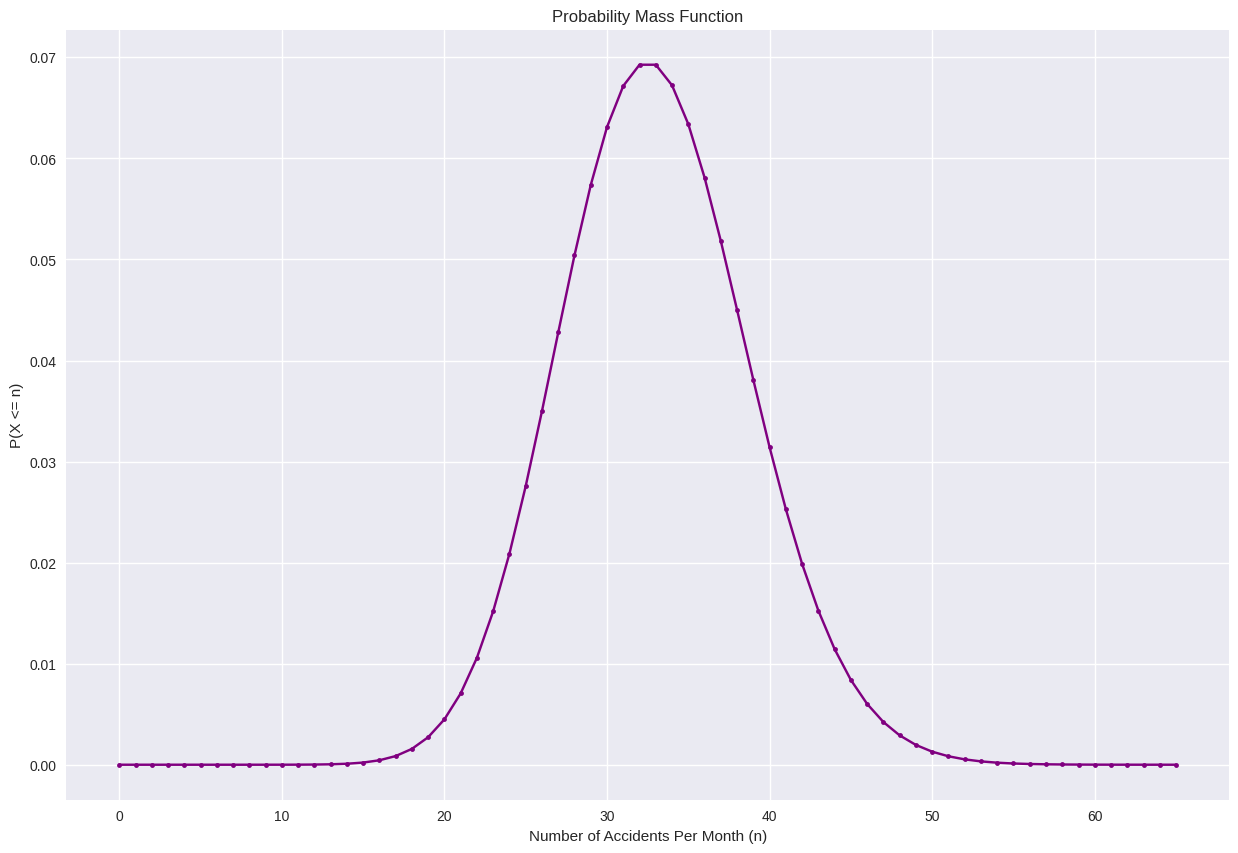

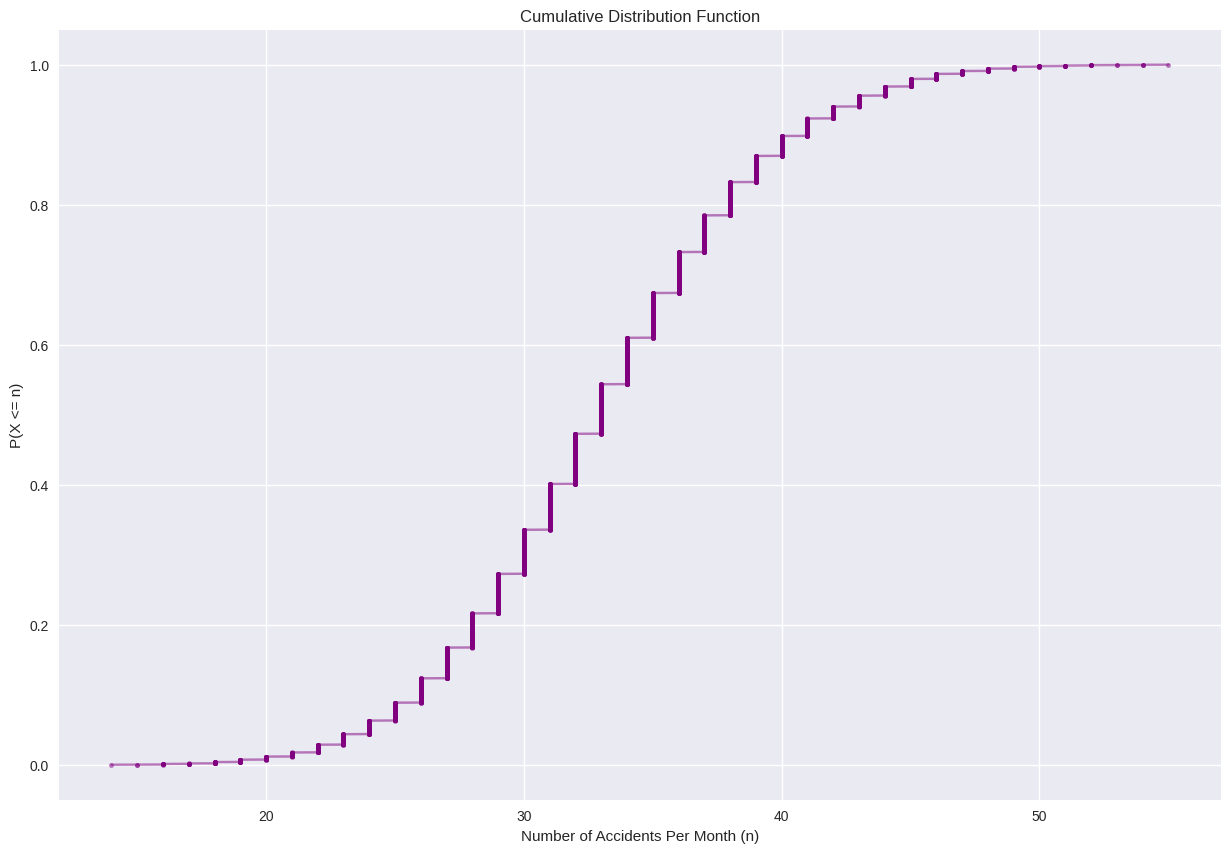

In [ ]:
import math
import matplotlib.pyplot as plt

X = {}
for i in range(66): #calculate probabilities for each value of n between 0 and 66
    X[i] = math.pow(2.71828,-1*33) * math.pow(33,i)/math.factorial(i)

p_poisson = pd.DataFrame(X.items(), columns=['X','PX'])

plt.style.use('seaborn')

fig = plt.subplots(figsize = (15,10))
plt.plot(p_poisson['X'],p_poisson['PX'] , marker='.', color = 'purple', linestyle='solid')
plt.xlabel('Number of Accidents Per Month (n)')
plt.ylabel('P(X <= n)')
plt.title('Probability Mass Function')
plt.show()

plt.close()

def cdf(data): #form a cumulative distribution function for data
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

np.random.seed(42)
samples_poisson = np.random.poisson(33,10000) #select a random sample of 3000 from a Poisson Distribution with mean = 33

x,y = cdf(samples_poisson)

fig = plt.subplots(figsize = (15,10))
_ = plt.plot(x, y, marker='.', alpha = 0.5, color = 'purple', linestyle='solid')
plt.xlabel('Number of Accidents Per Month (n)')
plt.ylabel('P(X <= n)')
plt.title('Cumulative Distribution Function')
plt.show()


#Exponential Distribution:

The Exponential Distribution is sometimes used to model the time that elapses before an event occurs. In addition, if events follow a Poisson process with a rate parameter of number of events per interval, then the waiting time from any starting point until the next event follows an exponential distribution with the same parameter of number of events per interval.

Using Pandas, we can calculate time between accidents for each accident in our sample. Then we use NumPy to estimate mean time in hours between accidents as a parameter for exponential distribution. Then we plot the cumulative distribution function of our sample data with a random sample of size 3000 generated from an exponential distribution to compare how well our actual data fits the exponential distribution model.

Mean time between accidents (h): 22.033076831305177


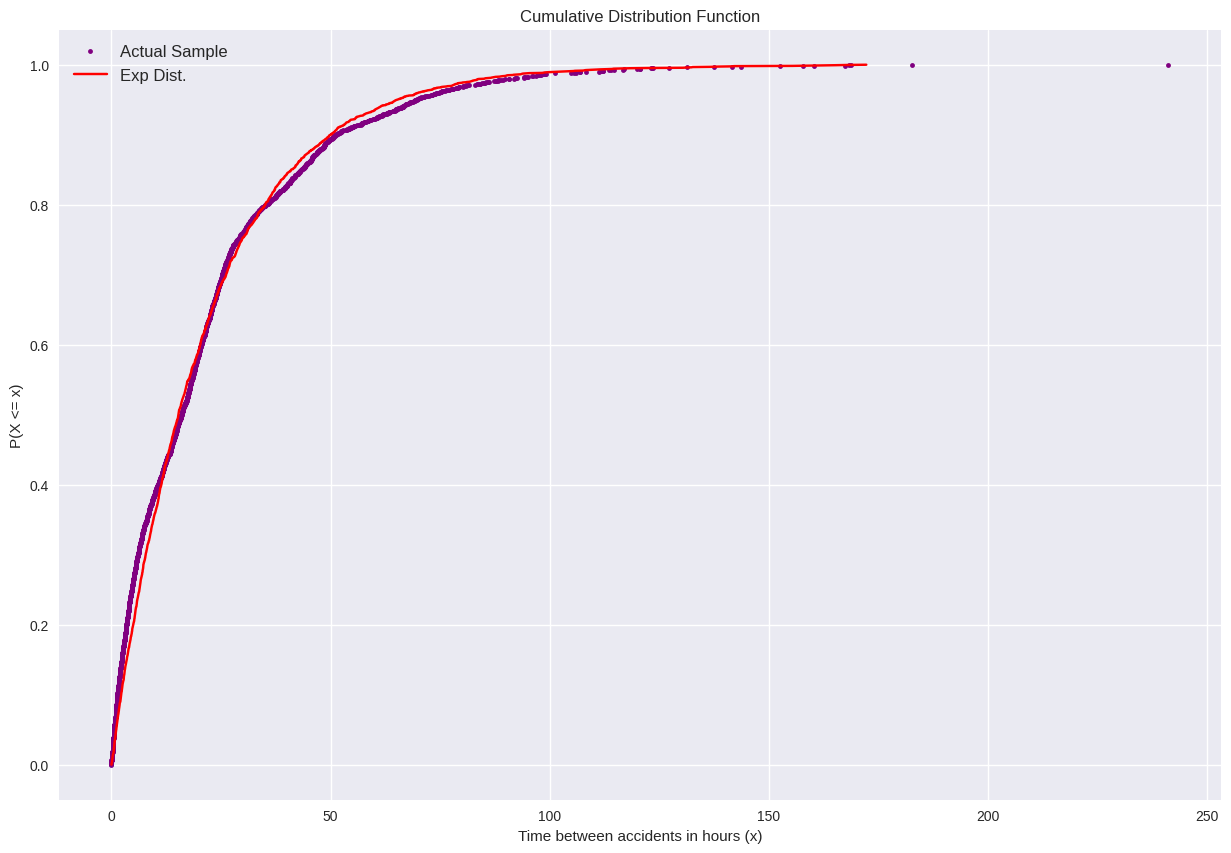

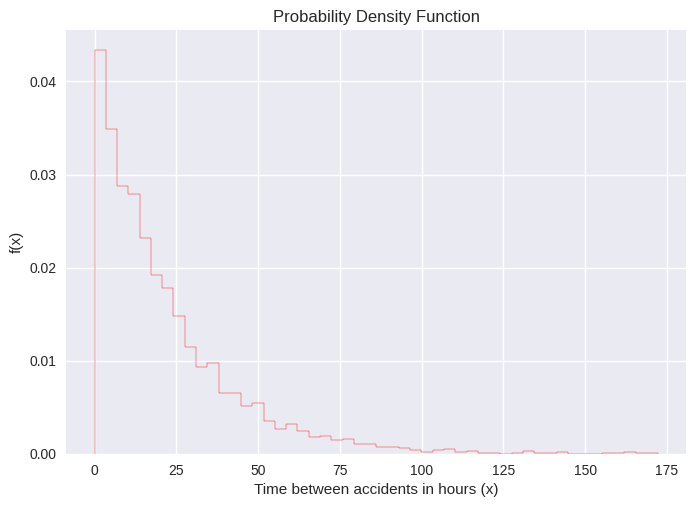

In [ ]:
data.sort_values(by=['Accident Date/Time'], ascending = True, inplace = True)
data['timetoAccident'] = data['Accident Date/Time'].diff() #compute time between each accident
data['timetoAccident_h'] = data.apply(lambda x: x['timetoAccident'].days * 24 + x['timetoAccident'].seconds/3600, axis = 1)
data= data[data.timetoAccident.notnull()]

mean = np.mean(data['timetoAccident_h']) #parameter for exponential distribution

print('Mean time between accidents (h): {0}'.format(mean))



x,y = cdf(data['timetoAccident_h']) #cumulative distribution for accidents data

samples_exp =np.random.exponential(mean,size=3000) #random sample from exponential distribution
x_theor_exp,y_theor_exp = cdf(samples_exp)

fig = plt.subplots(figsize = (15,10))
_ = plt.plot(x, y, label = 'Actual Sample', marker='.', linestyle='none', color = 'purple')
_ = plt.plot(x_theor_exp, y_theor_exp,label = 'Exp Dist.', color = 'red', linestyle='solid')
_ = plt.legend(fontsize = 'large')
_ = plt.xlabel('Time between accidents in hours (x)')
_ = plt.ylabel('P(X <= x)')
plt.title('Cumulative Distribution Function')
plt.show()

plt.close()

__ = plt.hist(samples_exp, bins = 50, density = True, histtype = 'step', color = 'red')
__ = plt.xlabel('Time between accidents in hours (x)')
__ = plt.ylabel('f(x)')
__ = plt.title('Probability Density Function')
plt.show()

plt.close()

#Mean time between accidents (h): 22.03307683130523

#Confidence Interval:

The confidence interval of sample has two parts associated with it. The first part is the that it gives a range of values i.e. a lower bound and an upper bound between which the true mean of the population can lie. The second part is the significance level of the range of values. Putting it altogether, if the data was sampled in the same way again and again, the range of values for which the true population mean was captured x% of times represents an x% confidence interval on that range of mean values. So, to calculate the confidence interval of the mean time to accidents of oil pipelines accidents in US dataset, repetition of this process is needed multiple times to get a range of values of mean where the true population mean would lie. But repeating this process i.e. oil pipeline accidents several times is practically impossible. However, theoretically these experiments can be repeated as many numbers of times as needed using Bootstrapping.

Bootstrap sampling is the use of resampled data to perform statistical inference i.e. to repeat the experiment under same conditions, a random sample with replacement of size n can repeatedly sampled from sample data. Using NumPy, bootstrap samples can be easily computed in python for our accidents data.

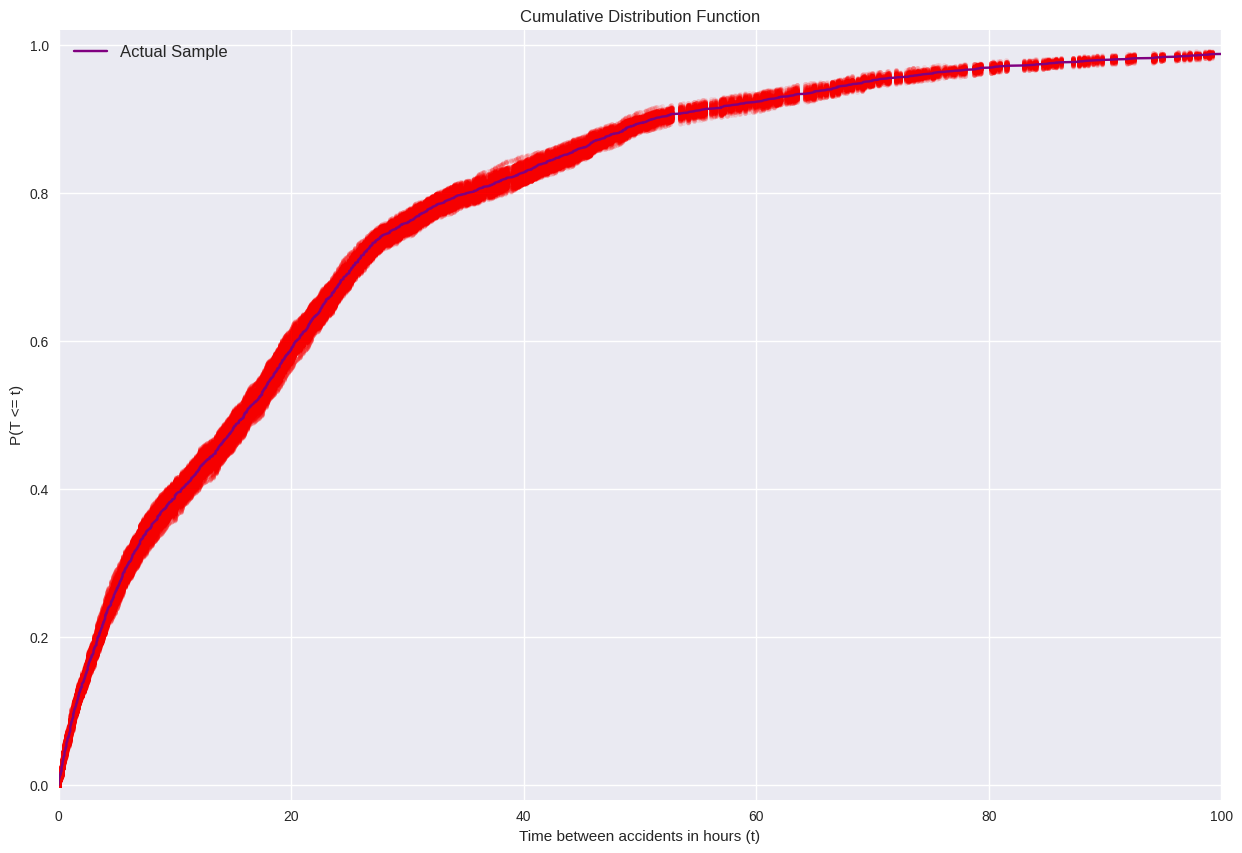

In [ ]:
fig = plt.subplots(figsize = (15,10))
___ =plt.gca()
___.set_xlim([0,100])

for a in range(100):
    bs_sample = np.random.choice(data['timetoAccident_h'], size=len(data['timetoAccident_h']))
    x, y = cdf(bs_sample)
    ___ = plt.plot(x, y, marker='.', linestyle = 'none',
                 color='red', alpha=0.1)

x, y = cdf(data['timetoAccident_h'])
___ = plt.plot(x, y, label = 'Actual Sample', color = 'purple',linestyle = 'solid')

___ = plt.margins(0.02)
___ = plt.legend(fontsize = 'large')
___ = plt.xlabel('Time between accidents in hours (t)')
___ = plt.ylabel('P(T <= t)')
plt.title('Cumulative Distribution Function')
plt.show()

plt.savefig('bssamples.png')

plt.close()

#BootStrap Replicate:

The distribution of 100 bootstrap samples is plotted on top of the actual data and as expected, the samples vary slightly from the actual sample while still closely maintaining the exponential distribution. The above plot has been zoomed to focus on the variation in samples. We now simply need the mean of each of our samples to compute a confidence interval on the sample mean. A statistic computed from a bootstrap sample is called a bootstrap replicate.

95% confidence interval = [21.15700728 22.9357531 ] hours


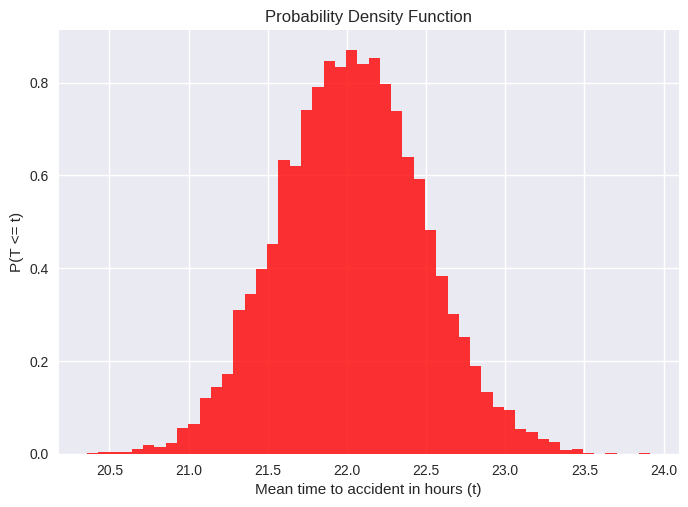

In [ ]:
def bootstrap_replicate_1d(data, func):
    #Generate bootstrap replicate of
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    #Draw bootstrap replicates

    bs_replicates = np.empty(size)

    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

bs_replicates = draw_bs_reps(data['timetoAccident_h'], np.mean, size=10000)

conf_int = np.percentile(bs_replicates,[2.5, 97.5])
print('95% confidence interval =', conf_int, 'hours')


____ = plt.hist(bs_replicates, bins=50, density=True, alpha = .8, color = 'red')
____ = plt.xlabel('Mean time to accident in hours (t)')
____ = plt.ylabel('P(T <= t)')
____ = plt.title('Probability Density Function')

plt.show()


### TASK 2: Genration of Visuals (30%)
#### In this task you are required to generate all visuals in a different type of visualizations i.e., replace boxplots with bar chart, graphs etc.

### Exploratory Data Analysis on Sales Dataset Q2

Loading dataset

In [ ]:
!gdown '1-gPmzVl-L2NGhY6-0GE6RopucCtWKJ8O'

Downloading...
From: https://drive.google.com/uc?id=1-gPmzVl-L2NGhY6-0GE6RopucCtWKJ8O
To: /content/SampleSuperstore2.xls
100% 505k/505k [00:00<00:00, 71.7MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_sales = pd.read_excel('SampleSuperstore2.xls')

print(data_sales.info())
data_sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         1166 non-null   int64         
 1   Order ID       1166 non-null   object        
 2   Order Date     1166 non-null   datetime64[ns]
 3   Ship Date      1166 non-null   datetime64[ns]
 4   Ship Mode      1166 non-null   object        
 5   Customer ID    1166 non-null   object        
 6   Customer Name  1166 non-null   object        
 7   Segment        1166 non-null   object        
 8   Country        1166 non-null   object        
 9   City           1166 non-null   object        
 10  State          1166 non-null   object        
 11  Postal Code    1166 non-null   int64         
 12  Region         1166 non-null   object        
 13  Product ID     1166 non-null   object        
 14  Category       1166 non-null   object        
 15  Sub-Category   1166 n

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,7981,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2.0,0.2,5.5512
1,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3.0,0.2,4.2717
2,593,CA-2014-135405,2014-01-09,2014-01-13,Standard Class,MS-17830,Melanie Seite,Consumer,United States,Laredo,...,78041,Central,OFF-AR-10004078,Office Supplies,Art,Newell 312,9.344,2.0,0.2,1.1680
3,866,CA-2014-149020,2014-01-10,2014-01-15,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,...,22153,South,OFF-LA-10004272,Office Supplies,Labels,Avery 482,2.890,1.0,0.0,1.3583
4,717,CA-2014-130092,2014-01-11,2014-01-14,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,...,19901,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2.0,0.0,3.0814


In [ ]:
len(data_sales)

1166

State wise Sales

In [ ]:
state_sales = data_sales['State'].value_counts()

print("states of Sales with Count:")
print(state_sales)

states of Sales with Count:
California              241
New York                120
Texas                   110
Illinois                 72
Pennsylvania             69
Washington               56
Ohio                     53
Florida                  43
North Carolina           40
Michigan                 31
Arizona                  31
Virginia                 30
Georgia                  26
Kentucky                 19
Wisconsin                16
Colorado                 15
Massachusetts            14
New Jersey               14
Tennessee                13
Indiana                  13
Minnesota                12
Oklahoma                 10
Oregon                   10
Connecticut               9
Delaware                  8
Utah                      8
Alabama                   8
Mississippi               8
South Carolina            7
Maryland                  7
Nevada                    6
Louisiana                 6
Iowa                      6
Missouri                  5
New Hampshire       

Annual Sales Counts

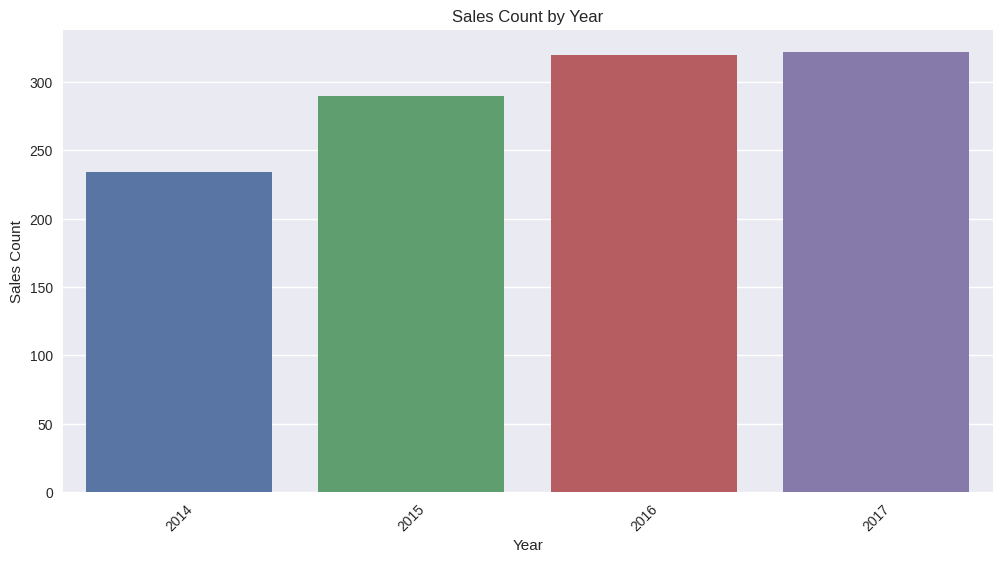

In [ ]:
data_sales['Year'] = data_sales['Order Date'].dt.year
data_sales['Month'] = data_sales['Order Date'].dt.month

plt.figure(figsize=(12, 6))
sns.countplot(data=data_sales, x='Year')
plt.title('Sales Count by Year')
plt.xlabel('Year')
plt.ylabel('Sales Count')
plt.xticks(rotation=45)
plt.show()

State wise Sales Plot

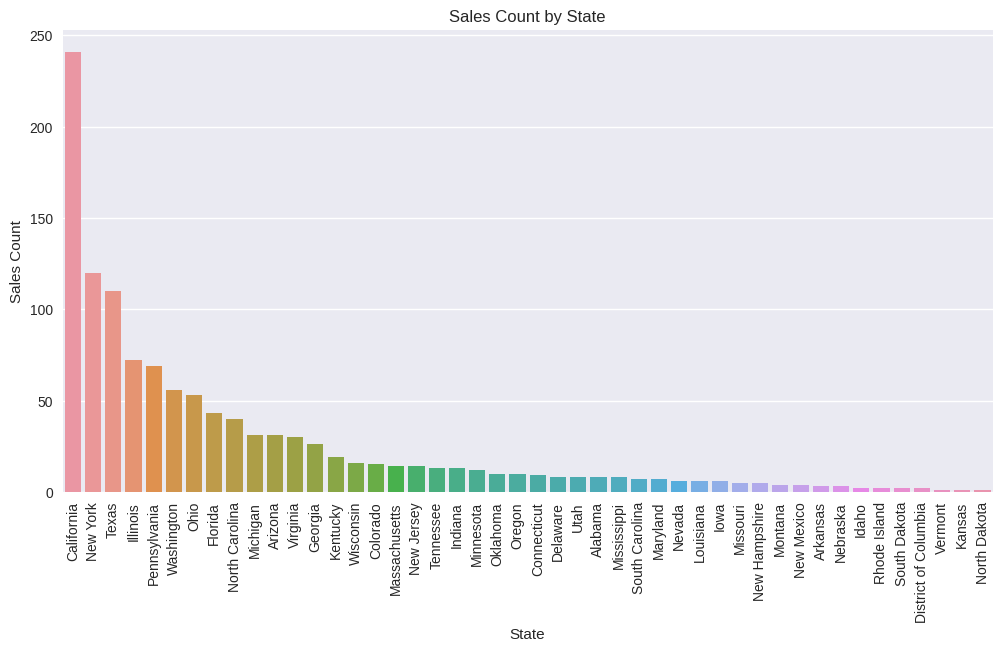

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data_sales, x='State', order=data_sales['State'].value_counts().index)
plt.title('Sales Count by State')
plt.xlabel('State')
plt.ylabel('Sales Count')
plt.xticks(rotation=90)
plt.show()

Sub-Category wise Sales

In [ ]:
subcat_sales = data_sales['Sub-Category'].value_counts()

print("Sub-Categories of Sales with Count:")
print(subcat_sales)

Sub-Categories of Sales with Count:
Binders        173
Paper          155
Furnishings    116
Art             99
Phones          96
Storage         89
Accessories     83
Chairs          78
Appliances      63
Labels          47
Tables          47
Envelopes       38
Bookcases       30
Fasteners       23
Supplies        12
Machines         9
Copiers          8
Name: Sub-Category, dtype: int64


Sub-Category wise Sales Plot

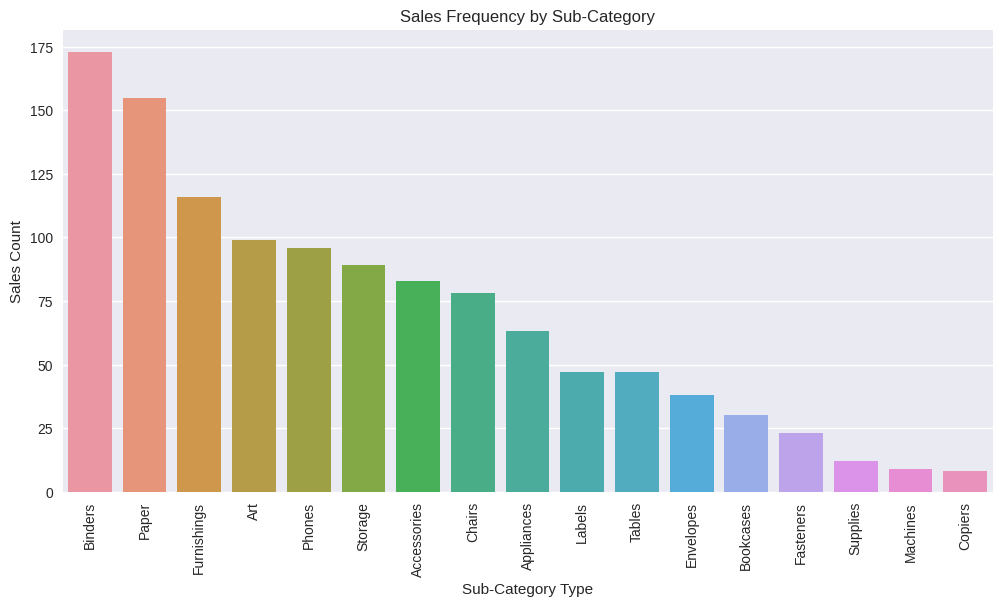

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data_sales, x='Sub-Category', order=data_sales['Sub-Category'].value_counts().index)
plt.title('Sales Frequency by Sub-Category')
plt.xlabel('Sub-Category Type')
plt.ylabel('Sales Count')
plt.xticks(rotation=90)
plt.show()


#Statistical Inference

Importing Libraries

In [ ]:
import pandas as pd


data_sales_si = pd.read_excel('SampleSuperstore2.xls')
cols_of_interest = ['Order Date','State','Category','Sub-Category','Sales','Quantity', 'Discount', 'Profit']
data_sales_si = data_sales_si[cols_of_interest] #remove columns not needed for this analysis
print(data_sales_si.head(5))

  Order Date     State         Category Sub-Category   Sales  Quantity  \
0 2014-01-03     Texas  Office Supplies        Paper  16.448       2.0   
1 2014-01-04  Illinois  Office Supplies       Labels  11.784       3.0   
2 2014-01-09     Texas  Office Supplies          Art   9.344       2.0   
3 2014-01-10  Virginia  Office Supplies       Labels   2.890       1.0   
4 2014-01-11  Delaware        Furniture  Furnishings   9.940       2.0   

   Discount  Profit  
0       0.2  5.5512  
1       0.2  4.2717  
2       0.2  1.1680  
3       0.0  1.3583  
4       0.0  3.0814  


In [ ]:
len(data_sales_si)

1166

Box Plot

<ipython-input-25-7471ff64a56d>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


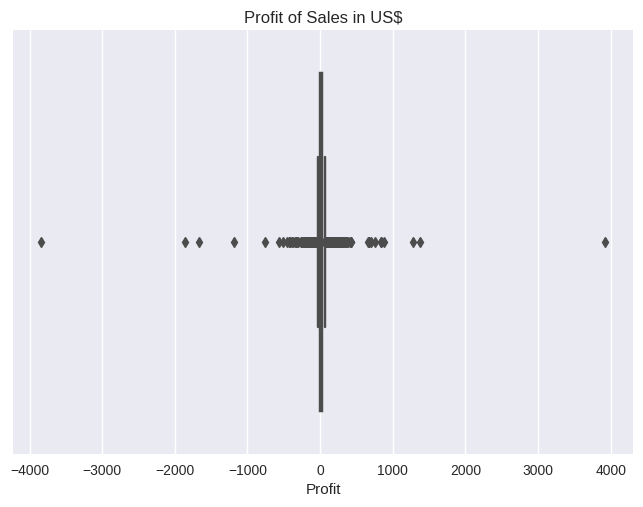

In [ ]:
import seaborn  as sns
import matplotlib.pyplot as plt


plt.style.use('seaborn')

sns.boxplot(data=data_sales_si, x='Profit')
plt.title('Profit of Sales in US$')
plt.show()


Poisson Distribution

In [ ]:
import numpy as np

data_sales_si['Order Date'] = pd.to_datetime(data_sales_si['Order Date'] )
totaltimespan = np.max(data_sales_si['Order Date']) - np.min(data_sales_si['Order Date'])

totaltime_hour = (totaltimespan.days*24 + totaltimespan.seconds/(3600))
totaltime_month = (totaltimespan.days + totaltimespan.seconds/(3600*24)) *12/365

totaltime_days = totaltimespan.days

print('Estimated no. of hours: {}'.format(totaltime_hour))
print('Estimated no. of months: {}'.format(totaltime_month))
print('Estimated no. of days: {}'.format(totaltime_days))

lmda_h = len(data_sales_si) / totaltime_hour
lmda_m = len(data_sales_si) / totaltime_month
lmda_d = len(data_sales_si) / totaltime_days

print('Estimated no. of sales per hour: {}'.format(lmda_h))
print('Estimated no. of sales per month: {}'.format(lmda_m))
print('Estimated no. of sales per day: {}'.format(lmda_d))


Estimated no. of hours: 34968.0
Estimated no. of months: 47.9013698630137
Estimated no. of days: 1457
Estimated no. of sales per hour: 0.03334477236330359
Estimated no. of sales per month: 24.34168382521162
Estimated no. of sales per day: 0.8002745367192862


<ipython-input-27-6e4fc5ee83d0>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


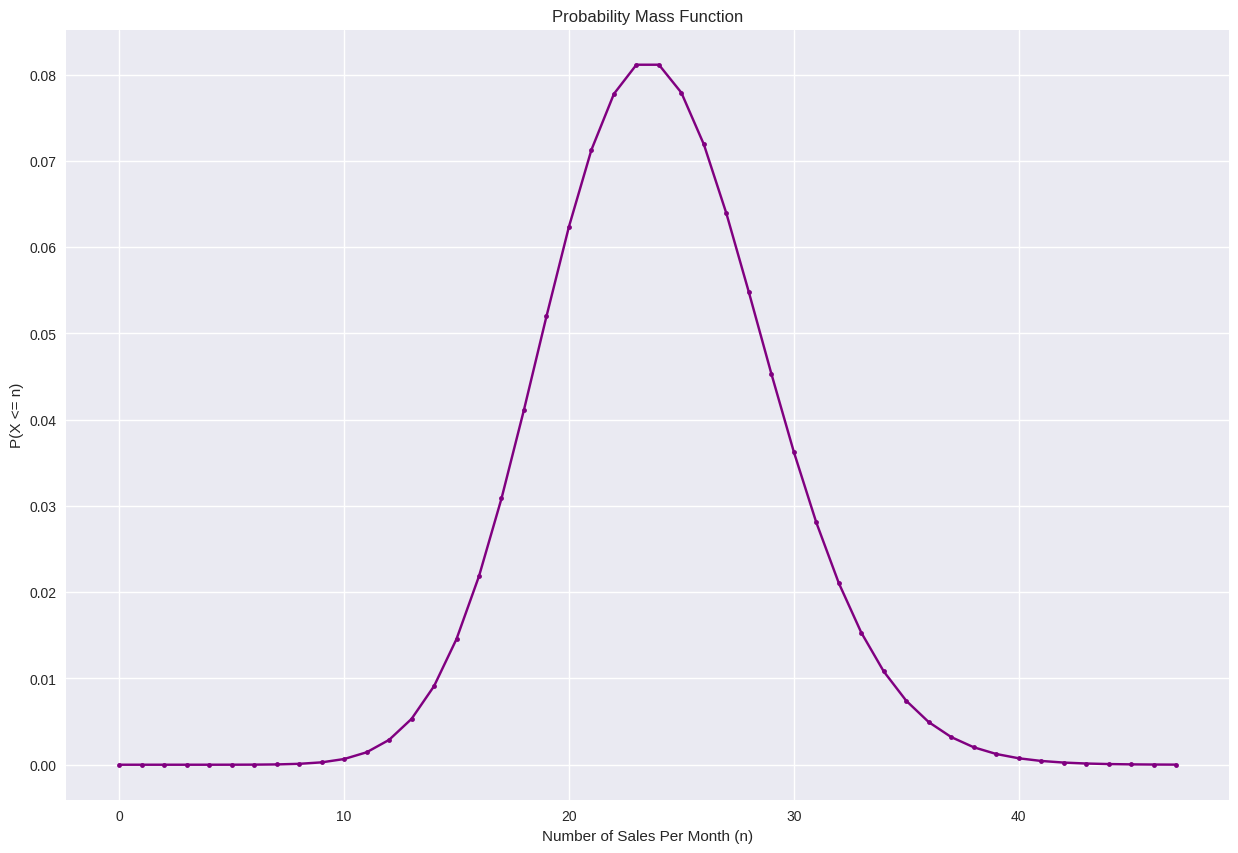

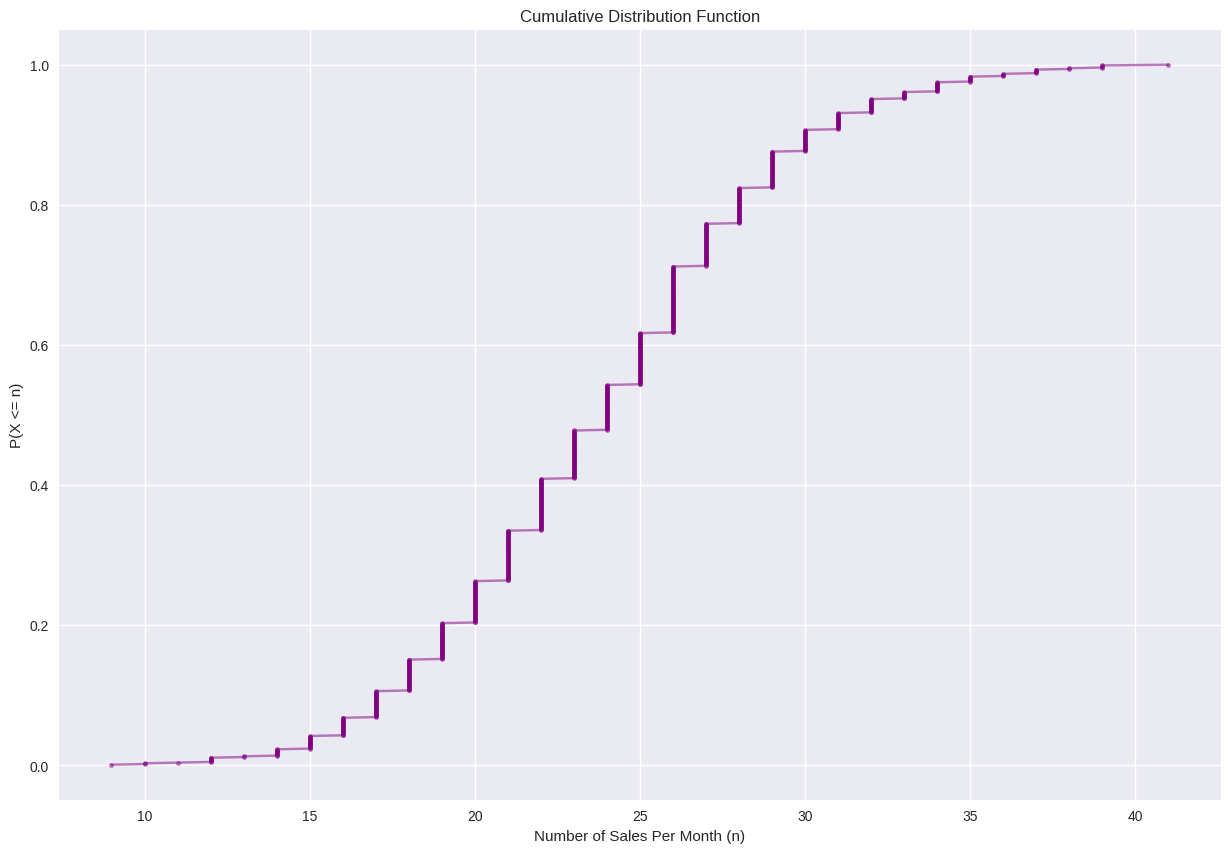

In [ ]:
import math
import matplotlib.pyplot as plt

X = {}
for i in range(48): #calculate probabilities for each value of n between 0 and 48
    X[i] = math.pow(2.71828,-1*24) * math.pow(24,i)/math.factorial(i)

p_poisson = pd.DataFrame(X.items(), columns=['X','PX'])

plt.style.use('seaborn')

fig = plt.subplots(figsize = (15,10))
plt.plot(p_poisson['X'],p_poisson['PX'] , marker='.', color = 'purple', linestyle='solid')
plt.xlabel('Number of Sales Per Month (n)')
plt.ylabel('P(X <= n)')
plt.title('Probability Mass Function')
plt.show()

plt.close()

def cdf(data_sales_si): #form a cumulative distribution function for data
    n = len(data_sales_si)
    x = np.sort(data_sales_si)
    y = np.arange(1, n+1) / n
    return x, y

np.random.seed(42)
samples_poisson = np.random.poisson(24,1000) #select a random sample of 1000 from a Poisson Distribution with mean = 24

x,y = cdf(samples_poisson)

fig = plt.subplots(figsize = (15,10))
_ = plt.plot(x, y, marker='.', alpha = 0.5, color = 'purple', linestyle='solid')
plt.xlabel('Number of Sales Per Month (n)')
plt.ylabel('P(X <= n)')
plt.title('Cumulative Distribution Function')
plt.show()


Exponential Distribution:

In [ ]:
data_sales_si.sort_values(by=['Order Date'], ascending = True, inplace = True)
data_sales_si['timetoSales'] = data_sales_si['Order Date'].diff() #compute time between each sales
print(data_sales_si['timetoSales'].head(5))
data_sales_si['timetoSales_d'] = data_sales_si.apply(lambda x: x['timetoSales'].days, axis = 1)
print(data_sales_si['timetoSales_d'].head(5))
data_sales_si= data_sales_si[data_sales_si.timetoSales.notnull()]
print(data_sales_si.head(5))
mean = np.mean(data_sales_si['timetoSales_d']) #parameter for exponential distribution

print('Mean time between sales (d): {0}'.format(mean))

0      NaT
1   1 days
2   5 days
3   1 days
4   1 days
Name: timetoSales, dtype: timedelta64[ns]
0    NaN
1    1.0
2    5.0
3    1.0
4    1.0
Name: timetoSales_d, dtype: float64
  Order Date      State         Category Sub-Category   Sales  Quantity  \
1 2014-01-04   Illinois  Office Supplies       Labels  11.784       3.0   
2 2014-01-09      Texas  Office Supplies          Art   9.344       2.0   
3 2014-01-10   Virginia  Office Supplies       Labels   2.890       1.0   
4 2014-01-11   Delaware        Furniture  Furnishings   9.940       2.0   
5 2014-01-13  Louisiana  Office Supplies    Envelopes  11.360       2.0   

   Discount  Profit timetoSales  timetoSales_d  
1       0.2  4.2717      1 days            1.0  
2       0.2  1.1680      5 days            5.0  
3       0.0  1.3583      1 days            1.0  
4       0.0  3.0814      1 days            1.0  
5       0.0  5.3392      2 days            2.0  
Mean time between sales (d): 1.2506437768240344


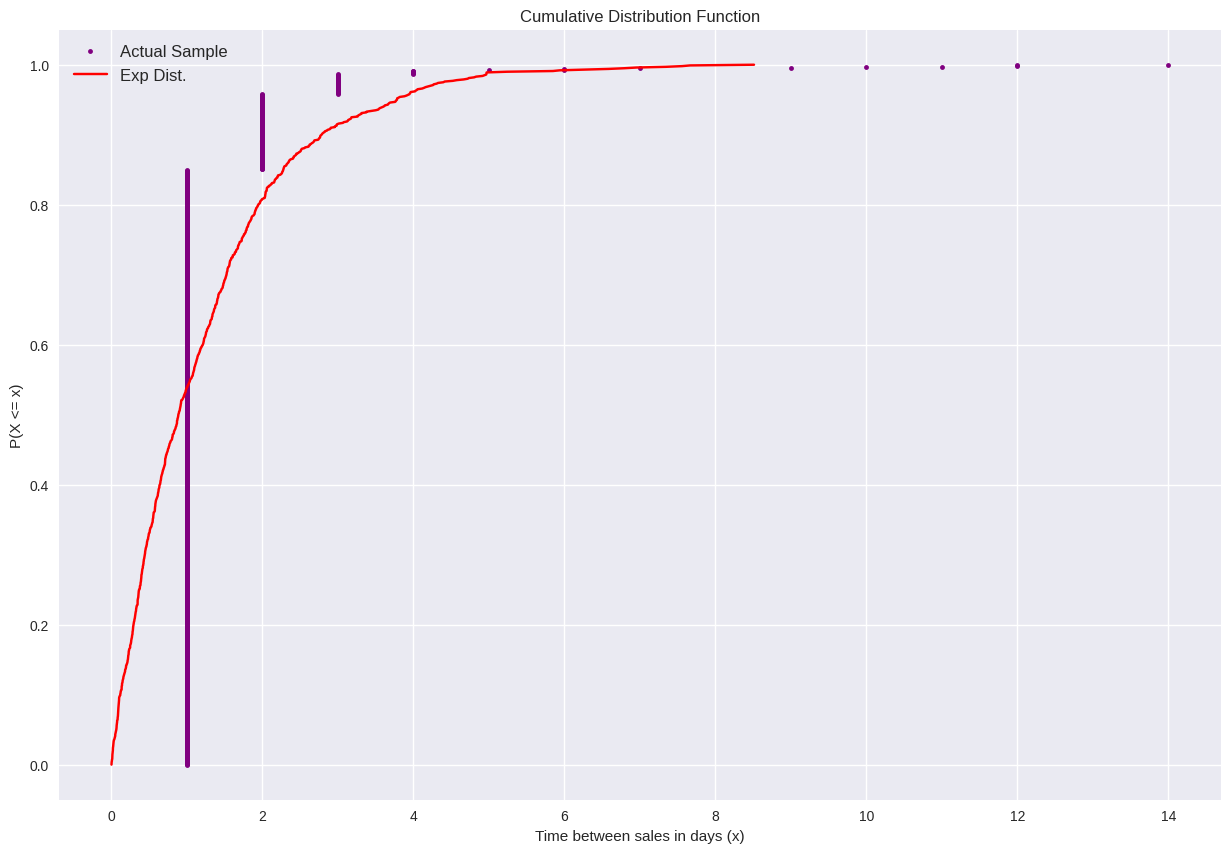

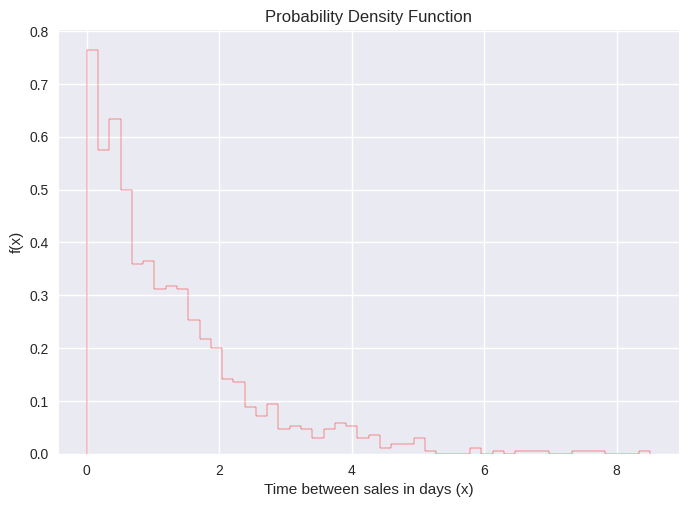

In [ ]:
x,y = cdf(data_sales_si['timetoSales_d']) #cumulative distribution for sales data

samples_exp =np.random.exponential(mean,size=1000) #random sample from exponential distribution
x_theor_exp,y_theor_exp = cdf(samples_exp)

fig = plt.subplots(figsize = (15,10))
_ = plt.plot(x, y, label = 'Actual Sample', marker='.', linestyle='none', color = 'purple')
_ = plt.plot(x_theor_exp, y_theor_exp,label = 'Exp Dist.', color = 'red', linestyle='solid')
_ = plt.legend(fontsize = 'large')
_ = plt.xlabel('Time between sales in days (x)')
_ = plt.ylabel('P(X <= x)')
plt.title('Cumulative Distribution Function')
plt.show()

plt.close()

__ = plt.hist(samples_exp, bins = 50, density = True, histtype = 'step', color = 'red')
__ = plt.xlabel('Time between sales in days (x)')
__ = plt.ylabel('f(x)')
__ = plt.title('Probability Density Function')
plt.show()

plt.close()


Confidence Interval

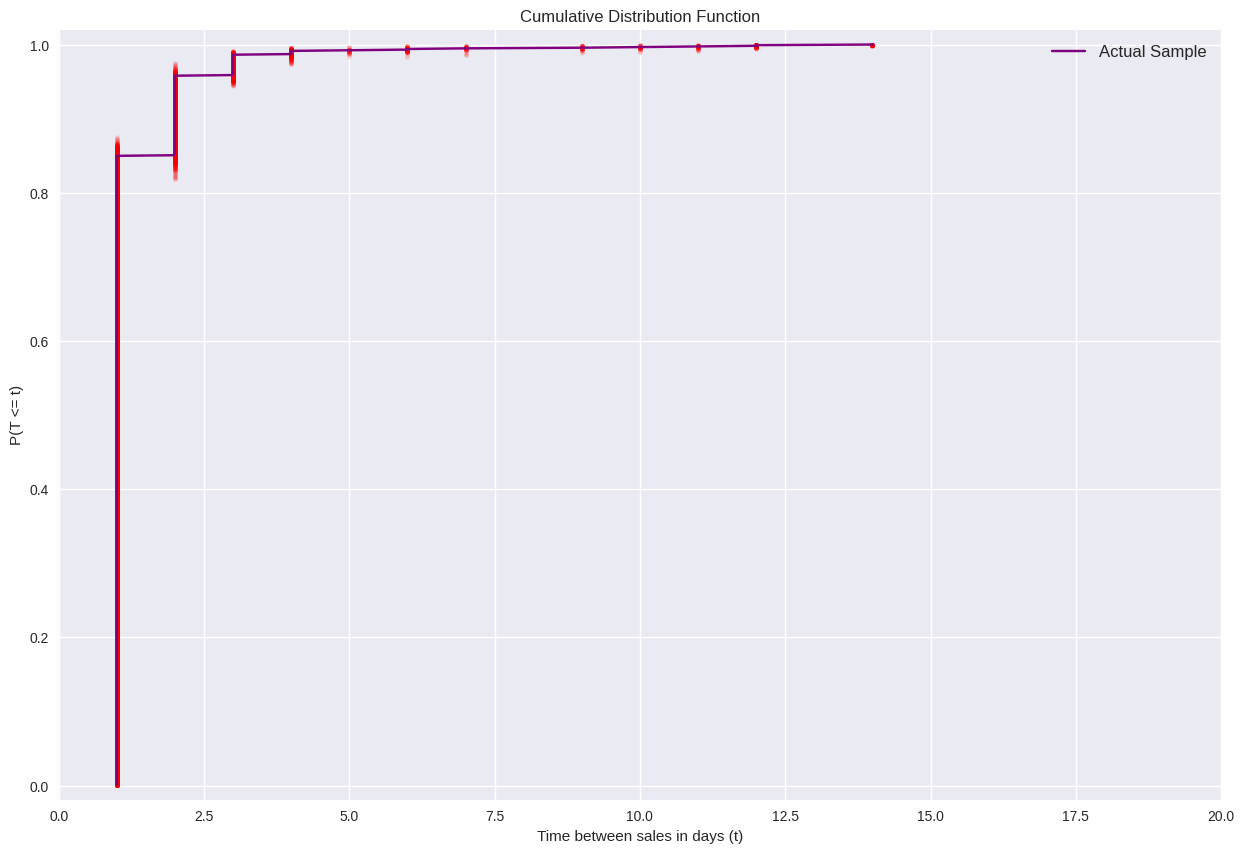

In [ ]:
fig = plt.subplots(figsize = (15,10))
___ =plt.gca()
___.set_xlim([0,20])

for a in range(50):
    bs_sample = np.random.choice(data_sales_si['timetoSales_d'], size=len(data_sales_si['timetoSales_d']))
    x, y = cdf(bs_sample)
    ___ = plt.plot(x, y, marker='.', linestyle = 'none',
                 color='red', alpha=0.1)

x, y = cdf(data_sales_si['timetoSales_d'])
___ = plt.plot(x, y, label = 'Actual Sample', color = 'purple',linestyle = 'solid')

___ = plt.margins(0.02)
___ = plt.legend(fontsize = 'large')
___ = plt.xlabel('Time between sales in days (t)')
___ = plt.ylabel('P(T <= t)')
plt.title('Cumulative Distribution Function')
plt.show()

plt.savefig('bssamples.png')

plt.close()

Bootstrap Replicate

95% confidence interval = [1.20171674 1.30815451] days


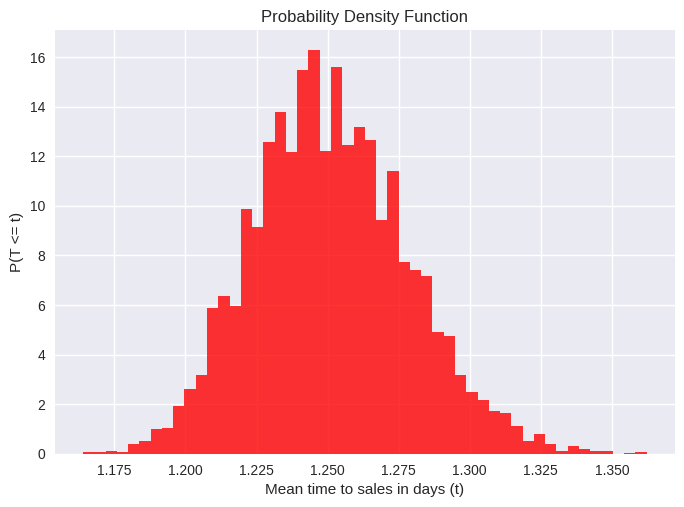

In [ ]:
def bootstrap_replicate_1d(data, func):
    #Generate bootstrap replicate of
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    #Draw bootstrap replicates

    bs_replicates = np.empty(size)

    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

bs_replicates = draw_bs_reps(data_sales_si['timetoSales_d'], np.mean, size=10000)

conf_int = np.percentile(bs_replicates,[2.5, 97.5])
print('95% confidence interval =', conf_int, 'days')


____ = plt.hist(bs_replicates, bins=50, density=True, alpha = .8, color = 'red')
____ = plt.xlabel('Mean time to sales in days (t)')
____ = plt.ylabel('P(T <= t)')
____ = plt.title('Probability Density Function')

plt.show()


##Detailed Analysis Q3

###Accident Dataset

I have started with EDA of Accidents data set for the USA pipeline accidents data which has 2795 entries with total 50 columns.

Started by checking state wise accident frequency, followed by plotting annual incident count which helps understanding rate of change over the years. I have also plotted the frequency of accidents for states, clearly highlighting Texas with highest incident counts. Then I have checked types of liquids and plotted their frequency. Crude Oil tops the incident count here.

In the next section, I have gone through statistical inference covering different aspects for pipeline accidents from 2010 to 2017. Out of 50 columns present in the dataset, only 6 are of high priority for this analysis, hence removing all other columns from the dataset. Got an overview for boxplot for cost of accidents which helped identifying certain outliers or extreme values.
Moving towards the Poisson distribution section, here estimation of hourly and monthly frequency of accidents was understood. Which further helped plotting probability mass function for number of accidents per month. Probability distribution for 33 accidents per month can be clearly observed from this plot.

Exponential distribution helps understand the time between occurrence of events and in this case mean time is coming as 22 hours between different incidents. Plotting cumulative distribution and probability density functions help understanding this relation of time between incidents.

Confidence interval helps understand the lower and upper bound and the actual sample in this case lies within this interval. 95% confidence interval for time between accidents lies around 21.1 to 22.9 hours, clearly observed in bootstrap replicate.


###Sales Dataset

I have used a superstore sales dataset as my choice of example for performing EDA and statistical inference for this exercise. This dataset has 21 columns with 1166 records. In EDA, I analyzed and plotted state wise count as well as annual frequency. Dataset has years as 2014 to 2017 where 2017 has maximum sales data. Also in state wise count plot, California can easily be identified with top sales count. Sub-Category wise sales has also been analyzed and plotted for reference.

In the next section of statistical inference, removed columns which are not important for analysis point of view. Found a few outliers on the profit front with the help of box-plot in the next step.
With the help of poisson distribution, analyzed sales on hourly, daily and monthly basis where plotted probability mass function for monthly sales values as 24.

Exponential distribution for mean time between sales stands at 1.25 days where distribution function plot between exponential distribution and actual sample appears disconnected as most of the data points have either 1.25 or 2 days as days between sales. Confidence levels cover days between sales transactions for actual samples mostly. Probability density with 95% confidence interval stays at 1.2 to 1.3 days between sales.
